In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('super_market.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
# drop duplicates
df = df.drop_duplicates()
df.fillna(0, inplace = True)

In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [20]:
print(df.describe())
df['product_line'].value_counts()
df['payment'].value_counts()
df['city'].value_counts()

        unit_price     quantity       tax_5%        sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross_margin_percentage  gross_income      rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [ ]:
# group by insights

In [30]:
df.groupby('branch')['gross_income'].sum()

branch
Alex     5057.1605
Cairo    5057.0320
Giza     5265.1765
Name: gross_income, dtype: float64

In [33]:
df.groupby('branch')['gross_income'].mean()

branch
Alex     14.874001
Cairo    15.232024
Giza     16.052367
Name: gross_income, dtype: float64

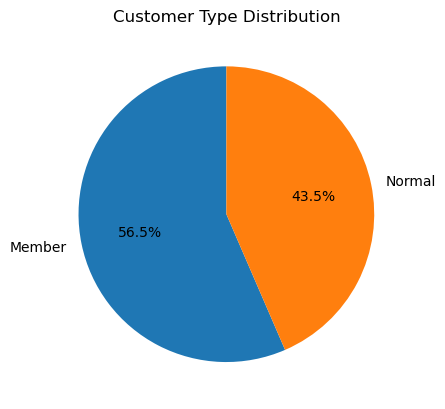

In [42]:
from matplotlib import pyplot as plt
counts = (df.groupby('customer_type')['customer_type'].count())

plt.pie(
    counts, 
    labels=counts.index,       # use customer_type as labels
    autopct='%1.1f%%',         # show percentages
    startangle=90              # rotate so first slice starts at the top
)

plt.title("Customer Type Distribution")
plt.show()


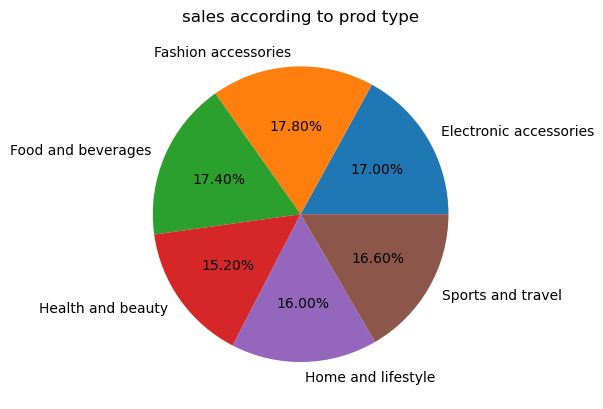

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

prod_class = df.groupby('product_line')['product_line'].count()

pie = plt.pie(
    prod_class,
    labels = prod_class.index,
    autopct = '%1.2f%%'
)

plt.title('sales according to prod type')
plt.show()

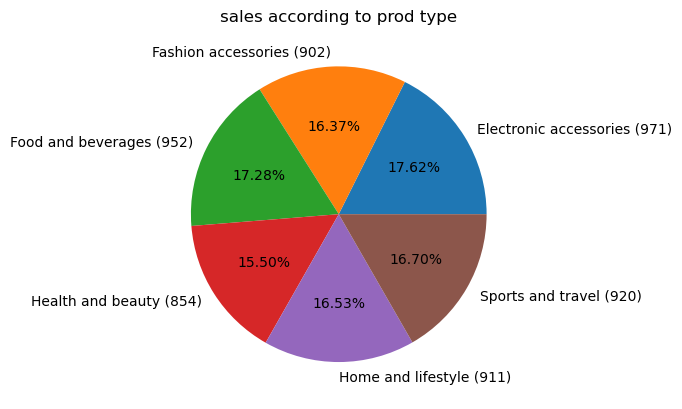

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

prod_class = df.groupby('product_line')['quantity'].sum()

pie = plt.pie(
    prod_class,
    labels = [f"{label} ({prod_class[label]})" for label in prod_class.index],
    autopct = '%1.2f%%'
)

plt.title('sales according to prod type')
plt.show()